<p style = "text-align:center"> <h1>Prostrate Cancer Classification</h1></p>

Date:  12 October 2017 
 
Version: 1

Environment: R 3.3.2 and Jupyter notebook

## Introduction

This notebook covers a complete data analysis task, which deals with **Exploratory Data Analysis**, **Regression**, and **Classification**. It involves exploring the data through getting different statistics, creating a regression model to impute several missing values, and analyzing different classifiers to determine which is suitable for the dataset. As said in the **no free lunch theorem**, no model can universally solve all problems, so indeed a comparison of different models is important.

**Exploratory Data Analysis** is a concept that has been a vital part of any data science task. It's always a must that one must explore that data to be able to propose an appropriate data analysis approach.

**Regression** has also been discussed in the past notebooks, so this will only cover a brief revision of the topic. Regression models are used to impute new or missing quantitative values based on the past or available values in the dataset. 

**Classification** is performed when the target variable is qualitative (or *categorical*). A previous notebook has already dealt with binary classification, and this notebook will feature multi-class classification.

## Contents
1. Exploratory Data Analysis
    <br/>1.1 Data Description 
    <br/>1.2 Determining Variable Type
    <br/>1.3 Data Cleaning
    <br/>1.4 Missing Observations
    <br/>1.5 Basic Statistics
    <br/>1.6 Variable Distribution
    <br/>1.7 Relationship Among Variables
2. Regression
    <br/>2.1 Predicting ATT1
    <br/>2.2 Predicting ATT3
    <br/>2.3 Predicting ATT4
    <br/>2.4 Predicting ATT5
    <br/>2.5 Summary
3. Classificaton
    <br/> 3.1 Naive Bayes Classifier
    <br/> 3.2 Decision Trees
    <br/> 3.3 Support Vector Machines (SVMs)
    <br/> 3.4 Neural Networks
4. Summary of the Classification Models 
5. Conclusion
6. References

In [1]:
# information about the R kernel and the machine used
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 15063)

locale:
[1] LC_COLLATE=English_Australia.1252  LC_CTYPE=English_Australia.1252   
[3] LC_MONETARY=English_Australia.1252 LC_NUMERIC=C                      
[5] LC_TIME=English_Australia.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.2            magrittr_1.5        IRdisplay_0.4.4    
 [4] pbdZMQ_0.2-6        tools_3.3.2         crayon_1.3.2       
 [7] uuid_0.1-2          stringi_1.1.5       IRkernel_0.8.7.9000
[10] jsonlite_1.5        stringr_1.2.0       digest_0.6.12      
[13] repr_0.12.0         evaluate_0.10.1    

In [2]:
# imported libraries
library(reshape2) # for using melt()
library(car)
library(glmnet) # for regression
library(klaR) # for naive bayes
library(caret) # for naive bayes
library(tree) # for decision trees
library(randomForest) # for random forest
library(e1071) # for svm
library(h2o) # for neural networks

Warning message:
"package 'reshape2' was built under R version 3.3.3"Warning message:
"package 'car' was built under R version 3.3.3"Warning message:
"package 'glmnet' was built under R version 3.3.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.3.3"Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.3.3"Loaded glmnet 2.0-10

Warning message:
"package 'klaR' was built under R version 3.3.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.3.3"Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'tree' was built under R version 3.3.3"Warning message:
"package 'randomForest' was built under R version 3.3.3"randomF

# 1. Exploration

This part comprises of the following tasks:
1. Importing the data
2. Checking the variable types
3. Cleaning the data 
4. Checking out missing values
5. Checking the basic statistics of the variables
6. Checking for the relationship between variables

## 1.1 Data Description

The data was imported using the `read.csv()` function.

The **data used** is a CSV file that describes different stages of prostrate cancer with 10 numerical, discrete features. There are four classes of prostrate cancer: 0 for **curable**, 1 for **tumour stage**, 2 for **node stage**, and 3 for **incurable cancers**. 


In [3]:
data <- read.csv('data3000Final.csv')
head(data)

ID,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
1,1,4,1,4,3,7,1,2,6,8,0
2,?,8,9,1,1,1,1,5,6,1,1
3,10,7,?,7,?,5,2,7,1,1,2
4,3,4,3,?,2,8,4,6,7,2,1
5,3,5,2,1,6,5,3,1,7,1,0
6,2,7,3,2,1,4,10,3,9,5,1


## 1.2 Determining Variable Type

To get an initial overview of the resulting dataframe, check the following:
- dimensions of the dataframe (how many rows of records? how many columns?)
- the initial parsing of the data (what are the data types?)
- are the data in the correct format?

#### Dimensions of the Dataframe

To check for the dimension, the function `dim()` is used. This function accepts a data frame and outputs the dimensions in *rows* x *columns*.

In [4]:
dim(data)

[1] 3000   12

#### Variable Types

There are 11 features, and all of them looks discrete. The features are named **ID, ATT1, ATT2, ATT3, ATT4, ATT5, ATT6, ATT7, ATT8, ATT9, and ATT10**, while the target variable is named **Result**. The feature names are not very descriptive, so it's hard to put them into context. However, we can still use basic statistics to determine some interesting properties of the data.

In [5]:
str(data)

'data.frame':	3000 obs. of  12 variables:
 $ ID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ATT1  : Factor w/ 11 levels "?","1","10","2",..: 2 1 3 5 5 4 2 10 4 2 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : Factor w/ 11 levels "?","1","10","2",..: 2 11 1 5 4 5 5 4 4 2 ...
 $ ATT4  : Factor w/ 11 levels "?","1","10","2",..: 6 2 9 1 2 4 7 8 2 10 ...
 $ ATT5  : Factor w/ 11 levels "?","1","10","2",..: 5 2 1 4 8 2 11 4 6 11 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: int  0 1 2 1 0 1 1 1 1 0 ...


We can see that ATT1, ATT3, ATT4, and ATT5 has missing values care of "?" sign.

## 1.3 Dataset Cleaning

As above, we can see there's an attribute called **ID** that is just used to uniquely identify each observation. Since this is irrelevant when performing data analysis, it is better to remove it.

A value of **"?" ** was also used to indicate missing values in the dataset. To conform with R standards, this variable must be turned into "NA". This makes it easier to filter and detect.

The remaining features which were classified as factor due to the existence of "?" were then converted to numeric to prepare it for the regression task.

In [6]:
# data cleaning

# remove 'ID' column
data <- data[, -1]

# replace ? with NA
data[data == '?'] <- NA

# convert data type to INT
data[, c(1, 3, 4, 5)] <- sapply(data[, c(1, 3, 4, 5)], as.character)
data[, c(1, 3, 4, 5)] <- sapply(data[, c(1, 3, 4, 5)], as.numeric)

str(data)

'data.frame':	3000 obs. of  11 variables:
 $ ATT1  : num  1 NA 10 3 3 2 1 8 2 1 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : num  1 9 NA 3 2 3 3 2 2 1 ...
 $ ATT4  : num  4 1 7 NA 1 2 5 6 1 8 ...
 $ ATT5  : num  3 1 NA 2 6 1 9 2 4 9 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: int  0 1 2 1 0 1 1 1 1 0 ...


## 1.4 Checking for Missing Variables

Since the "?" observations were converted into `NA`, one can easily count the number of missing features by just using the `is.na()` function. 

In [7]:
# how many NA's do we have?
data[is.na(data)]
length(data[is.na(data)])

[1] NA NA NA NA

[1] 4

Based from the `str()` call above, these four `NA`s are under **ATT1, ATT3, ATT4, and ATT5**. 

Since there are 4 `NA`s located in unique features, we need to produce 4 regression models.

## 1.5 Computing for Data Statistics

One can easily get various statistics per feature by calling the `summary()` function. It also counts the number of `NA`'s per feature to validate the number of missing values that the data have.

In [8]:
summary(data)

      ATT1             ATT2             ATT3             ATT4      
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 4.00  
 Mean   : 4.425   Mean   : 4.501   Mean   : 4.422   Mean   : 4.44  
 3rd Qu.: 7.000   3rd Qu.: 7.000   3rd Qu.: 7.000   3rd Qu.: 6.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
 NA's   :1                         NA's   :1        NA's   :1      
      ATT5             ATT6             ATT7             ATT8       
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 4.000  
 Mean   : 4.326   Mean   : 4.431   Mean   : 4.479   Mean   : 4.478  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.000   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :10.000   Max.   

**Reflections**
- All the attributes are 'scaled' from 1 to 10.
- The `summary()` call validates that there are indeed four missing values in different attributes.
- All of the mean and median of the attributes are around ~4, which makes it likely that all of them follow the **Normal Distribution**.

## 1.6 Determining the Variables' Distribution

It is a good practice to check the distribution of the features by plotting its histogram. To do this we can use `ggplot()` that creates pretty and neat histograms.

No id variables; using all as measure variables
Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

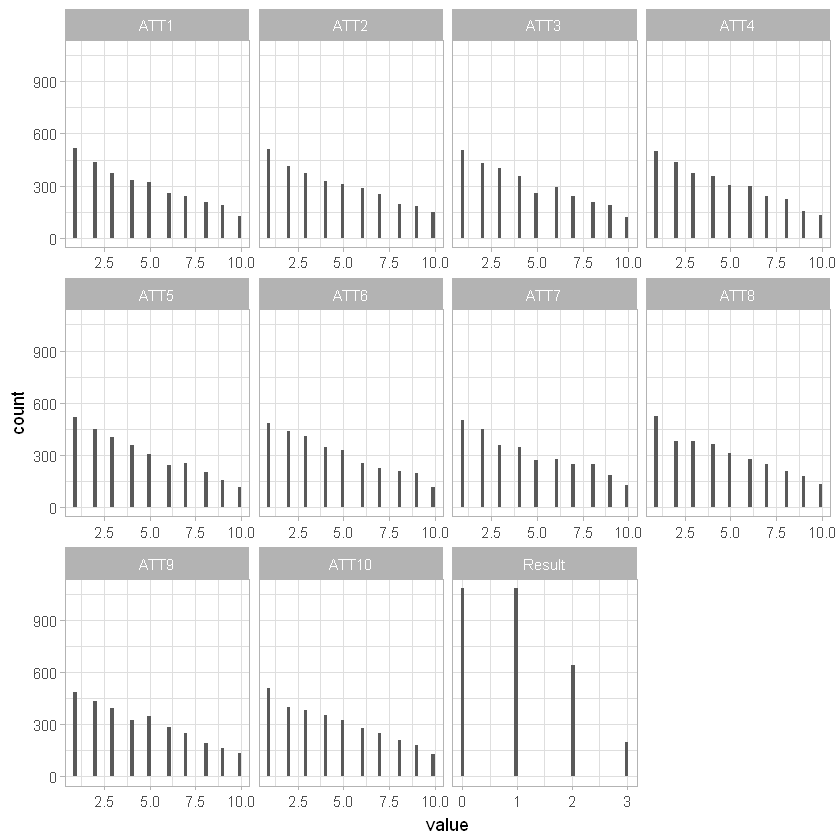

In [9]:
melted.data <- melt(data[1:(length(data))])
histograms <- ggplot(data = melted.data, mapping = aes(x = value)) + 
                    geom_histogram(bins = 50) + facet_wrap(~variable, scales = 'free_x') + theme_light() 
histograms

**Reflections**
- Apparently, all of the features do **not** follow the Normal Distribution. However, they all follow the same distribution that resembles the Binomial distribution.
- There's also a class imbalance that exists. From the histogram of **Result** we can see that the class **3** is under-represented. Putting it into context, based on the dataset there are less people with **incurable prostrate cancer** than those whose cancers are treatable, which is a good thing!

## 1.7 Determining the Association Between Variables

To find any *linear* correlation between two variables, we can just get their correlation coefficients since all of them are numerical variables. 

In [10]:
cor <- cor(as.matrix(na.omit(data)))
cor

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
ATT1,1.00000000,0.04610493,0.08060515,0.05601720,0.04422308,0.05452177,0.07122578,0.05026351,0.05418733,0.05468297,0.3742627
ATT2,0.04610493,1.00000000,0.06709630,0.06157343,0.03169298,0.03936361,0.01121757,0.02974010,0.09424293,0.07271654,0.3512550
ATT3,0.08060515,0.06709630,1.00000000,0.04656806,0.06498553,0.04017917,0.03144363,0.02602814,0.06029647,0.08543024,0.3652525
ATT4,0.05601720,0.06157343,0.04656806,1.00000000,0.08003001,0.04547098,0.05860170,0.02125053,0.02801731,0.08264849,0.3603542
ATT5,0.04422308,0.03169298,0.06498553,0.08003001,1.00000000,0.04995859,0.07143985,0.02907593,0.08373312,0.08360732,0.3742799
ATT6,0.05452177,0.03936361,0.04017917,0.04547098,0.04995859,1.00000000,0.02315537,0.04078043,0.06728710,0.06281401,0.3338361
ATT7,0.07122578,0.01121757,0.03144363,0.05860170,0.07143985,0.02315537,1.00000000,0.07823218,0.03721329,0.06658368,0.3406121
ATT8,0.05026351,0.02974010,0.02602814,0.02125053,0.02907593,0.04078043,0.07823218,1.00000000,0.04319090,0.03377578,0.3271048
ATT9,0.05418733,0.09424293,0.06029647,0.02801731,0.08373312,0.06728710,0.03721329,0.04319090,1.00000000,0.01185411,0.3495902
ATT10,0.05468297,0.07271654,0.08543024,0.08264849,0.08360732,0.06281401,0.06658368,0.03377578,0.01185411,1.00000000,0.3730892


Looks like getting the correlation coefficients does not yield any interesting results, as most of them are between 0 to 0.3. This says that a *weak linear relationship* exists among the variables.

We can also create a scatter plot matrix among the attributes to check if we can spot any trend.

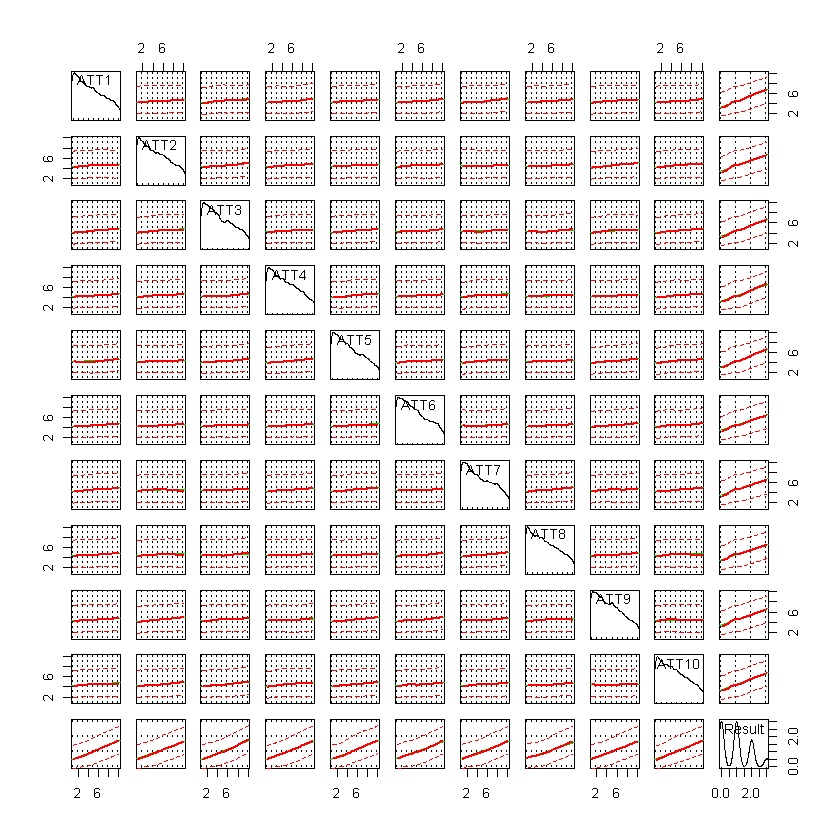

In [11]:
options(warn=-1)
scatterplotMatrix(data,cex=0.2)
options(warn=0)

Most of the trends are not exactly linear; however, their relationship with result *somehow* hints a linear structure. Since  linearity is less apparent with this dataset, non-linear methods might perform better.


# 2. Regression

After exploring the data, it's now time to impute missing observations.

**Regression Models Used**

Since the dataset is very huge, less flexible models can be used to impute the data. One of the easier yet robust methods for imputing the data is to use a **generalized linear model with regularization.** Both **Lasso** and **Ridge** linear regression are easy to do and interpret.

If these models don't do well (i.e. produce a high RMSE) then more complex models can ba used.

**Recap: Linear Regression**

To recap, a linear regression model takes the form

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... + \beta_nX_n + \epsilon
$$

Where $Y$ is the target variable,
<br/>$\beta_0$ is the intercept, 
<br/>$\beta_n$ is the slope with respect to feature $X_n$ that describes its relationship to the target variable, and
<br/>$\epsilon$ is the residual or the irreducible error.

The goal of linear regression is to estimate the regression coefficients $\beta_0, \beta_1, \beta_2, ..., \beta_n$ that minimises the residual sum of squares (RSS).

$$
RSS = \sum_{i=1}^{n}(y_i - y_\text{pred})^2
$$

Which just says that the coefficients must result to predicted $y$ values that are close to the actual $y$ values as possible.


**Recap: Regularization**

Regularization is used to minimize the error function

$$
E(\pmb{w}) = \sum_{i=1}^{n} (\pmb{y}_\text{pred} - \pmb{y}_i)^2 + \lambda *\sum_{j=1}^{m}(||\pmb{w}_j||^q)
$$

where

$\pmb{y}_\text{pred} = \pmb{w_0} + \pmb{w_1}.\mathbf{x_1} + ... + \pmb{w_i}.\mathbf{x_i}$ is the linear regression prediction function.

Note: the main parameter of regularization is just the added term "$\lambda *||\pmb{w}||^q$" with $\lambda$ as the **shrinkage penalty** that forces the coefficients to shrink to avoid overfitting.

There are two types of regularization, depending on the value of **q** above:

1. **Ridge Regularization** - also known as L2 penalty, this is when q = 2.  
2. **Lasso Regularization** - also known as L1 penalty, this is when q = 1.

In addition, Lasso Regularization yields *sparse models*--that is, models that only use a subset of the features, while Ridge Regularization always includes them all.

**Training and Testing Dataset**

The first step to imputing the missing values is to divide the data into training and testing sets to reduce bias. The most common form of this division is to devote 80% of the dataset to training while the remaining 20% to testing.

In [12]:
# split data into training and test sets
train.len <- nrow(data) * 0.80
train.index <- sample(1:nrow(data), train.len)
train <- data[train.index,]
test <- data[-train.index,]

train <- na.omit(train)
test <- na.omit(test)

nrow(train)
nrow(test)

[1] 2397

[1] 600

We also have to declare the error function to get the **root mean squared-error** that is just the square-root version of the RSS. This describes the average deviation of the predicted to the actual target values.

$$
RMSE = \sqrt{\sum_{i=1}^{n}(y_i - y_\text{pred})^2}
$$

In [13]:
get.rmse <- function(predicted.values, actual.values){
    p.length <- length(predicted.values)
    a.length <- length(actual.values)
    
    if (p.length == a.length){
        # square the errors (difference of predicted and actual)
        squared.errors <- (predicted.values - actual.values)^2
        
        # get the mean
        mean.squared.errors <- mean(squared.errors)
        
        # return the resulting square root
        return (sqrt(mean.squared.errors))
    }
    else{
        stop("Both numeric vectors must be equal!")
    }
}

**Modelling Procedure**

Creating the Ridge and Lasso Regression will need several of the tools that were used in previous noteboooks. To create the linear model, the function `glmnet()` is used because it allows regularization. **Cross validation** of the training data is used to find the best lambda via `cv.glmnet()` which is then used in the `predict()` function to predict. There are two predictions involved, one using the testing data to capture the **RMSE** that describes the goodness-of-fit, while another is to actually predict the missing values.

## 2.1 Predicting ATT1

In this section, we have to create a regularized linear regression to predict the feature **ATT1**, which will become the target variable.

The corresponding linear model is

**ATT1** = $\beta_0$ + $\beta_1$**ATT2** + $\beta_2$**ATT3** + $\beta_3$**ATT4** + $\beta_4$**ATT5** + $\beta_5$**ATT6** + $\beta_6$**ATT7** + $\beta_7$**ATT8** + $\beta_8$**ATT9** + $\beta_9$**ATT10** + $\beta_\text{10}$**Result**

With the coefficients subject to L1 and L2 regularizer.

Note that I have included `Result` as a feature for this model because out of all the attributes it is the one with the highest correlation to ATT1.

In [14]:
# create matrices but remove its intercept
training.mat <- model.matrix(ATT1 ~ ., data = train)[,-1]
testing.mat <- model.matrix(ATT1 ~., data = test)[,-1]

# put NAs as 0 for prediction
predict.data <- data[1:5,]
predict.data[is.na(predict.data)] <- 0
predict.matrix <- model.matrix(ATT1 ~ ., data = predict.data)[,-1]

# create a ridge regression model for attribute 1
cv.model <- cv.glmnet(training.mat, train$ATT1, alpha = 0)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT1, alpha = 0)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nRidge Regression Model for Predicting ATT1:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att1.ridge.rmse <- get.rmse(predicted, test$ATT1)
cat("\nRidge RMSE: ", att1.ridge.rmse)

att1.ridge.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[2]
cat("\nRidge prediction: ", att1.ridge.pred)

cat("\n\n==========================================================================")

# create a lasso regression model for attribute 1
cv.model <- cv.glmnet(training.mat, train$ATT1, alpha = 1)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT1, alpha = 1)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\n\nLasso Regression Model for Predicting ATT1:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att1.lasso.rmse <- get.rmse(predicted, test$ATT1)
cat("\nLasso RMSE: ", att1.lasso.rmse)
att1.lasso.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[2]
cat("\nLasso prediction: ", att1.lasso.pred)


Best Lambda:  0.1114247
Ridge Regression Model for Predicting ATT1:

(Intercept)        ATT2        ATT3        ATT4        ATT5        ATT6 
  9.1627327  -0.1852387  -0.1694569  -0.1853875  -0.2080058  -0.1802417 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.1733493  -0.1767690  -0.1961661  -0.1943645   2.7348671 

Ridge RMSE:  2.316864
Ridge prediction:  5.888388

Best Lambda:  0.001507629

Lasso Regression Model for Predicting ATT1:

(Intercept)        ATT2        ATT3        ATT4        ATT5        ATT6 
 11.1302836  -0.2539226  -0.2380944  -0.2554540  -0.2766663  -0.2455601 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.2381096  -0.2460284  -0.2615091  -0.2618323   3.4794411 

Lasso RMSE:  2.287218
Lasso prediction:  6.358676

**Analysis of the models**
- For **Ridge Regularization**, the best lambda is at **0.11**, which means that the coefficients did not shrink that much. The RMSE of the ridge model is at 2.32, which means on average the predicted value of ATT1 is just +/- 2 from the actual value, which is a good fit. The rounded predicted value is **6**.
<br/><br/>
- For **Lasso Regularization**, the best lambda is even lower at **0.002**, which is why the model included all of the features. The shrinkage penalty is small, so the model was not penalized harshly. The RMSE of the lasso model is at 2.28, which suggests a good fit. The rounded predicted value is **6**.

In this case since the Lasso produced a slightly lower RMSE we get the imputed value from the Lasso model.

In [15]:
data$ATT1[is.na(data$ATT1)] <- round(att1.lasso.pred)

## 2.2 Predicting ATT3

In this section, we have to create a regularized linear regression to predict the feature **ATT3**, which will become the target variable.

The corresponding linear model is

**ATT3** = $\beta_0$ + $\beta_1$**ATT1** + $\beta_2$**ATT2** + $\beta_3$**ATT4** + $\beta_4$**ATT5** + $\beta_5$**ATT6** + $\beta_6$**ATT7** + $\beta_7$**ATT8** + $\beta_8$**ATT9** + $\beta_9$**ATT10** + $\beta_\text{10}$**Result**

With the coefficients subject to L1 and L2 regularizer.

In [16]:
# create matrices but remove its intercept
training.mat <- model.matrix(ATT3 ~ ., data = train)[,-1]
testing.mat <- model.matrix(ATT3 ~., data = test)[,-1]

# put NAs as 0 for prediction
predict.data <- data[1:5,]
predict.data[is.na(predict.data)] <- 0
predict.matrix <- model.matrix(ATT3 ~ ., data = predict.data)[,-1]

# create a ridge regression model for attribute 3
cv.model <- cv.glmnet(training.mat, train$ATT3, alpha = 0)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT3, alpha = 0)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nRidge Regression Model for Predicting ATT3:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att3.ridge.rmse <- get.rmse(predicted, test$ATT3)
cat("\nRidge RMSE: ", att3.ridge.rmse)

att3.ridge.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[3]
cat("\nRidge prediction: ", att3.ridge.pred)

cat("\n\n==========================================================================")

# create a lasso regression model for attribute 3b
cv.model <- cv.glmnet(training.mat, train$ATT3, alpha = 1)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT3, alpha = 1)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nLasso Regression Model for Predicting ATT3:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att3.lasso.rmse <- get.rmse(predicted, test$ATT3)
cat("\nLasso RMSE: ", att3.lasso.rmse)
att3.lasso.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[3]
cat("\nLasso prediction: ", att3.lasso.pred)


Best Lambda:  0.111552
Ridge Regression Model for Predicting ATT3:

(Intercept)        ATT1        ATT2        ATT4        ATT5        ATT6 
  8.9081773  -0.1737813  -0.1567280  -0.1981111  -0.1696120  -0.1956056 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.1937489  -0.1944582  -0.1599971  -0.1547668   2.6596837 

Ridge RMSE:  2.249016
Ridge prediction:  6.964361

Best Lambda:  0.001656511
Lasso Regression Model for Predicting ATT3:

(Intercept)        ATT1        ATT2        ATT4        ATT5        ATT6 
 10.8685129  -0.2454073  -0.2254344  -0.2664504  -0.2387652  -0.2591901 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.2564524  -0.2616092  -0.2257816  -0.2226459   3.3976473 

Lasso RMSE:  2.210324
Lasso prediction:  7.677994

**Analysis of the models**
- For **ridge regularization**, the best lambda is at **0.11**, which means that the coefficients did not shrink that much. The RMSE of the ridge model is at 2.2, which means on average the predicted value of ATT3 is just +/- 2 from the actual value, which is a good fit. The rounded predicted value is **7**.
<br/><br/>
- For **lasso regularization**, the best lambda is even lower at **0.002**, which is why the model included all of the features. The shrinkage penalty is small, so the model was not penalized harshly. The RMSE of the lasso model is at 2.2, which suggests a good fit. The rounded predicted value is **8**.

Since the Lasso model is slightly better, assign the Lasso prediction to the missing data.

In [17]:
data$ATT3[is.na(data$ATT3)] <- round(att3.lasso.pred)

## 2.3 Predicting ATT4

In this section, we have to create a regularized linear regression to predict the feature **ATT4**, which will become the target variable.

The corresponding linear model is

**ATT4** = $\beta_0$ + $\beta_1$**ATT1** + $\beta_2$**ATT2** + $\beta_3$**ATT3** + $\beta_4$**ATT5** + $\beta_5$**ATT6** + $\beta_6$**ATT7** + $\beta_7$**ATT8** + $\beta_8$**ATT9** + $\beta_9$**ATT10** + $\beta_\text{10}$**Result**

With the coefficients subject to L1 and L2 regularizer.

In [18]:
# create matrices but remove its intercept
training.mat <- model.matrix(ATT4 ~ ., data = train)[,-1]
testing.mat <- model.matrix(ATT4 ~., data = test)[,-1]

# put NAs as 0 for prediction
predict.data <- data[1:5,]
predict.data[is.na(predict.data)] <- 0
predict.matrix <- model.matrix(ATT4 ~ ., data = predict.data)[,-1]

# create a ridge regression model for attribute 3
cv.model <- cv.glmnet(training.mat, train$ATT4, alpha = 0)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT4, alpha = 0)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nRidge Regression Model for Predicting ATT4:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att4.ridge.rmse <- get.rmse(predicted, test$ATT4)
cat("\nRidge RMSE: ", att4.ridge.rmse)

att4.ridge.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[4]
cat("\nRidge prediction: ", att4.ridge.pred)

cat("\n\n==========================================================================")

# create a lasso regression model for attribute 3b
cv.model <- cv.glmnet(training.mat, train$ATT4, alpha = 1)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT4, alpha = 1)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nLasso Regression Model for Predicting ATT4:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att4.lasso.rmse <- get.rmse(predicted, test$ATT4)
cat("\nLasso RMSE: ", att4.lasso.rmse)
att4.lasso.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[4]
cat("\nLasso prediction: ", att4.lasso.pred)


Best Lambda:  0.1096343
Ridge Regression Model for Predicting ATT4:

(Intercept)        ATT1        ATT2        ATT3        ATT5        ATT6 
  8.9336669  -0.1849580  -0.1729899  -0.1927152  -0.1615991  -0.1689068 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.1621612  -0.2081055  -0.1942829  -0.1574861   2.6543911 

Ridge RMSE:  2.299298
Ridge prediction:  4.516396

Best Lambda:  0.001483405
Lasso Regression Model for Predicting ATT4:

(Intercept)        ATT1        ATT2        ATT3        ATT5        ATT6 
 10.8722113  -0.2556558  -0.2404377  -0.2586604  -0.2307082  -0.2331553 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.2257977  -0.2741895  -0.2581296  -0.2249593   3.3861746 

Lasso RMSE:  2.262615
Lasso prediction:  4.621874

**Analysis of the models**
- For **ridge regularization**, the best lambda is at **0.1**, which means that the coefficients did not shrink that much. The RMSE of the ridge model is at 2.3, which means on average the predicted value of ATT3 is just +/- 2 from the actual value, which is a good fit. The rounded predicted value is **5**.
<br/><br/>
- For **lasso regularization**, the best lambda is even lower at **0.001**, which is why the model included all of the features. The shrinkage penalty is small, so the model was not penalized harshly. The RMSE of the lasso model is also at 2.3, which suggests a good fit. The rounded predicted value is also **5**.

Since both models predicted the same rounded value then either models can be used.

In [19]:
data$ATT4[is.na(data$ATT4)] <- round(att4.lasso.pred)

## 2.4 Predicting ATT5

In this section, we have to create a regularized linear regression to predict the feature **ATT5**, which will become the target variable.

The corresponding linear model is

**ATT5** = $\beta_0$ + $\beta_1$**ATT1** + $\beta_2$**ATT2** + $\beta_3$**ATT3** + $\beta_4$**ATT4** + $\beta_5$**ATT6** + $\beta_6$**ATT7** + $\beta_7$**ATT8** + $\beta_8$**ATT9** + $\beta_9$**ATT10** + $\beta_\text{10}$**Result**

With the coefficients subject to L1 and L2 regularizer.

In [20]:
# create matrices but remove its intercept
training.mat <- model.matrix(ATT5 ~ ., data = train)[,-1]
testing.mat <- model.matrix(ATT5 ~., data = test)[,-1]

# put NAs as 0 for prediction
predict.data <- data[1:5,]
predict.data[is.na(predict.data)] <- 0
predict.matrix <- model.matrix(ATT5 ~ ., data = predict.data)[,-1]

# create a ridge regression model for attribute 5
cv.model <- cv.glmnet(training.mat, train$ATT5, alpha = 0)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT5, alpha = 0)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nRidge Regression Model for Predicting ATT5:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att5.ridge.rmse <- get.rmse(predicted, test$ATT5)
cat("\nRidge RMSE: ", att5.ridge.rmse)

att5.ridge.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[3]
cat("\nRidge prediction: ", att5.ridge.pred)

cat("\n\n==========================================================================")

# create a lasso regression model for attribute 5
cv.model <- cv.glmnet(training.mat, train$ATT5, alpha = 1)
best.lambda <- cv.model$lambda.min
leastsq.mod <- glmnet(training.mat, train$ATT5, alpha = 1)
model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(train),]
cat("\nBest Lambda: ", best.lambda)
cat("\nLasso Regression Model for Predicting ATT5:\n\n")
print(model.coef)

predicted <- predict(leastsq.mod, s = best.lambda, newx=testing.mat, type = "response")
att5.lasso.rmse <- get.rmse(predicted, test$ATT4)
cat("\nLasso RMSE: ", att5.lasso.rmse)
att5.lasso.pred <- predict(leastsq.mod, s = best.lambda, newx=predict.matrix, type = "response")[3]
cat("\nLasso prediction: ", att5.lasso.pred)


Best Lambda:  0.1046193
Ridge Regression Model for Predicting ATT5:

(Intercept)        ATT1        ATT2        ATT3        ATT4        ATT6 
  8.9330610  -0.2070363  -0.2066924  -0.1649959  -0.1616630  -0.1745022 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.1690380  -0.1968501  -0.1625602  -0.1664461   2.6269584 

Ridge RMSE:  2.209214
Ridge prediction:  5.300616

Best Lambda:  0.001415549
Lasso Regression Model for Predicting ATT5:

(Intercept)        ATT1        ATT2        ATT3        ATT4        ATT6 
 10.8053606  -0.2743154  -0.2704385  -0.2296962  -0.2285861  -0.2362575 
       ATT7        ATT8        ATT9       ATT10      Result 
 -0.2301564  -0.2610525  -0.2254528  -0.2311064   3.3349704 

Lasso RMSE:  2.898478
Lasso prediction:  5.475878

**Analysis of the models**
- For **ridge regularization**, the best lambda is at **0.10**, which means that the coefficients did not shrink that much. The RMSE of the ridge model is at 2.2, which means on average the predicted value of ATT3 is just +/- 2 from the actual value, which is a good fit. The rounded predicted value is **5**.
<br/><br/>
- For **lasso regularization**, the best lambda is even lower at **0.001**, which is why the model included all of the features. The shrinkage penalty is small, so the model was not penalized harshly. The RMSE of the lasso model is at 2.89 which is higher than the ridge but still suggests a good fit. The rounded predicted value is also **5**.

Since both models predicted the same rounded value then either models can be used.

In [21]:
data$ATT5[is.na(data$ATT5)] <- round(att5.ridge.pred)

## 2.5 Summary

In general, regularized linear regression models worked well in imputing the values. The effect of regularization, however, is not as prominent, as the best lambda is always a small value. Nevertheless, the RMSE of the test data against the model is just around 2.3-2.8, which suggests a good enough fit. 

# 3. Prostrate Cancer Classification

Since we're done imputing the missing values, it's time to create a good classifier for prostrate cancer. The aim of this part of the notebook is to create a model with the highest possible **accuracy**, or the proportion of the correct predictions over the total number of observations.

**Classifiers Used**

The following classification models are used in this notebook:

- **Naive Bayes Classifier** 
<br/>A *generative* probabilistic model that computes the probability of each observation belonging to a class by using Bayes' Theorem.


- **Decision Trees and Random Forest** 
<br/>A *tree-based* method that splits the predictor space into several simple regions based on a set of splitting rules.


- **SVMs** 
<br/>A method that evolved from a classifier called *maximal-margin classifier* and *support vector classifier* and is known to be one of the most flexible classifiers.


- **Neural Networks**
<br/>A model that mimics how a human brain learns by generating a collection of neurons that work together to solve a specific problem.

Each models will be described in depth in the succeeding sections.

**Data Preprocessing**

First, let's preprocess the data. I have decided to turn the result into a factor, since it is a categorical variable. As for the attributes, since according to the data description they are rounded <u>numeric</u> measurements I shall leave them as is. 

In [22]:
data$Result <- factor(data$Result, levels = c(0:3))
str(data)

'data.frame':	3000 obs. of  11 variables:
 $ ATT1  : num  1 6 10 3 3 2 1 8 2 1 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : num  1 9 8 3 2 3 3 2 2 1 ...
 $ ATT4  : num  4 1 7 5 1 2 5 6 1 8 ...
 $ ATT5  : num  3 1 5 2 6 1 9 2 4 9 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: Factor w/ 4 levels "0","1","2","3": 1 2 3 2 1 2 2 2 2 1 ...


** Training and Testing Dataset**

The dataset is again split into two groups, with 80% of the data used for training and 20% for testing the classifier.

In [23]:
# did we have any problems converting everything into factor?
data[is.na(data)]

set.seed(1234)
# split into train and test sets again
train.len <- nrow(data) * 0.80
train.index <- sample(1:nrow(data), train.len)
train <- data[train.index,]
test <- data[-train.index,]

train <- na.omit(train)
test <- na.omit(test)

# was there any NA rows?
nrow(train)
nrow(test)

str(train)
str(test)

character(0)

[1] 2400

[1] 600

'data.frame':	2400 obs. of  11 variables:
 $ ATT1  : num  9 7 4 9 5 9 2 4 1 1 ...
 $ ATT2  : int  4 4 3 4 7 9 7 4 3 8 ...
 $ ATT3  : num  2 1 6 2 2 6 3 3 8 9 ...
 $ ATT4  : num  5 6 7 6 3 1 2 10 5 5 ...
 $ ATT5  : num  7 2 3 1 7 7 10 2 3 2 ...
 $ ATT6  : int  6 5 8 9 5 8 6 2 4 1 ...
 $ ATT7  : int  5 4 7 5 4 2 7 1 7 7 ...
 $ ATT8  : int  4 7 5 9 7 6 9 1 9 2 ...
 $ ATT9  : int  4 2 7 2 5 3 5 1 3 4 ...
 $ ATT10 : int  5 2 2 9 6 1 4 4 7 9 ...
 $ Result: Factor w/ 4 levels "0","1","2","3": 3 1 3 3 3 3 3 1 2 2 ...
'data.frame':	600 obs. of  11 variables:
 $ ATT1  : num  6 7 2 1 4 3 3 6 3 5 ...
 $ ATT2  : int  2 10 2 2 3 3 8 6 10 9 ...
 $ ATT3  : num  2 7 5 10 2 2 2 9 5 5 ...
 $ ATT4  : num  1 10 7 8 2 1 8 6 3 2 ...
 $ ATT5  : num  1 2 5 3 1 3 6 1 6 9 ...
 $ ATT6  : int  2 6 1 2 10 1 5 8 9 10 ...
 $ ATT7  : int  4 9 2 1 1 5 6 7 4 5 ...
 $ ATT8  : int  8 6 2 8 6 1 2 3 2 4 ...
 $ ATT9  : int  6 4 3 2 4 4 3 7 1 10 ...
 $ ATT10 : int  10 2 4 7 4 5 1 9 2 3 ...
 $ Result: Factor w/ 4 levels "0","1

## 3.1 Naive Bayes Classifier

Note: Materials used in this section are based from FIT 5201: Data Analysis Algorithms lecture notes.

**Naive Bayes Classifier** is a classifier that generates a probability distribution for each class and then calculates the probability of an observation to belong in a class using the Bayes' Theorem.

The main assumption of this model is that **all features are independent from each other**. Since all of the features exhibit low correlation coefficient, it is possible that the features may be independent.

Generating the probability distribution of each class $\mathcal{C}_k$ requires the following:
- prior probabilities $\pmb{p(\mathcal{C}_k)}$ which is just the fraction of observations that belong to each class $\mathcal{C}_k$ in the whole dataset
- class means $\mu_k$
- class covariance matrices $\mathbf{S}_k$
- shared covariance matrix$\Sigma$

The conditional probability $p(x | \mathcal{C}_k)$ is derived from the distribution density function using the $\mu_k$ and $\Sigma$. 

Once you have calculated $p(\mathcal{C}_k)$ and $p(x|\mathcal{C}_k)$, Bayes theorem can now be used to calculate the posterior $p(\mathcal{C}_k|x)$ probabilities for each class. 

$$
p(\mathcal{C}_k|x) = \frac{p\mathcal{C}_k . p(x|\mathcal{C}_k)}{p(x)}
$$

Whichever has the bigger posterior probability is the chosen class for the data.

To create the classifier, the function `train()` from the package `klaR` is used, with the parameter `'nb'` indicating that we aim for a Naive Bayes Classifier. **Cross-validation** is also performed in order to determine the accuracy of the model against the training data. The one with the best **accuracy** is picked as the best model.

In [24]:
x <- train[,-ncol(train)]
y <- train[,ncol(train)]
options(warn=-1)

# create a Naive Bayes model by cross-validating the training set
naiveBayes <- train(x,y,'nb',trControl=trainControl(method='cv',number=10))
naiveBayes

options(warn=0)

Naive Bayes 

2400 samples
  10 predictor
   4 classes: '0', '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2161, 2160, 2160, 2160, 2160, 2160, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.7820878  0.6748585
   TRUE      0.7808309  0.6711068

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.

**Analysis of the model**

The average training accuracy of the cross-validated Naive Bayes model is **78%**, which is good enough. There is a lesser chance of overfitting as the model did not have a perfect accuracy for the training data. 

In [25]:
options(warn=-1)
naiveBayes.trainPred <- predict(naiveBayes$finalModel,train[,-ncol(train)])$class
naiveBayes.trainAccuracy <- confusionMatrix(naiveBayes.trainPred, train[,ncol(train)])$overall['Accuracy']
cat("\nNaive Bayes Train Accuracy: ", naiveBayes.trainAccuracy)

naiveBayes.pred <- predict(naiveBayes$finalModel,test[,-ncol(test)])$class
naiveBayes.testAccuracy <- confusionMatrix(naiveBayes.pred, test[,ncol(test)])$overall['Accuracy']
cat("\nNaive Bayes Test Accuracy: ", naiveBayes.testAccuracy)
options(warn=0)


Naive Bayes Train Accuracy:  0.7941667
Naive Bayes Test Accuracy:  0.7733333

The best considered model from cross validation produced an accuracy of **79%**, which is a good fit. When tested against the test data, it produced an accuracy of **77%** which is robust enough. It is impressive considering Naive Bayes Classifier is one of the simplest models to create and computationally inexpensive.

## 3.2 Decision Trees

**Decision Trees** are one of the easiest models to interpret due to its structure. The tree is grown by recursively splitting the predictor space into two, based on a criterion which can either be one the following: *classification error rate*, the *Gini index*, or the *entropy*. Decision trees aim to produce a tree that maximizes **node purity** -- that is, the probability that a node contains all observations from a single class. In the three criteria used, both the *Gini index* and *entropy* takes into account node purity.

The reason why I chose to include decision trees is because there is no clear linear relationship that exists in the dataset and because of the resulting models are easier to interpret.

### 3.2.1 Basic Decision Tree

To create a classification tree, the method `tree()` is used. The function `plot()` and `text()` are then called to display the tree. 

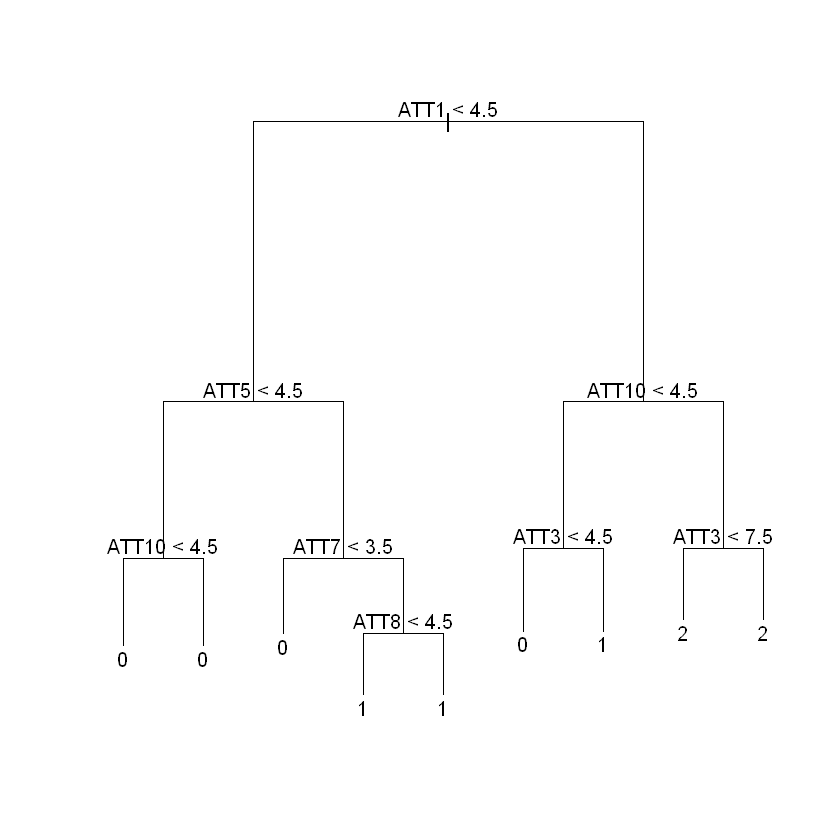

In [26]:
# create a cross validated decision tree
decisionTree <- tree(Result ~ ., data = train)
plot(decisionTree)
text(decisionTree, pretty = 1)

In [27]:
dt.trainPred <- predict(decisionTree, newdata = train, type="class")
dt.trainAccuracy <- confusionMatrix(dt.trainPred, train[,ncol(train)])$overall['Accuracy']
cat("\n Decision Tree Train Accuracy: ", dt.trainAccuracy)

dt.pred <- predict(decisionTree, newdata = test, type="class")
dt.accuracy <- confusionMatrix(dt.pred, test[,ncol(test)])$overall['Accuracy']
cat("\n\n Decision Tree Test Accuracy: ", dt.accuracy)


 Decision Tree Train Accuracy:  0.4979167

 Decision Tree Test Accuracy:  0.48

**Analysis of the model**
- Based on the resulting classification tree, **ATT1** is considered the most important attribute. The data then proceeds to the left if its ATT1 is either **1, 2, 3, 4**, otherwise the data goes to the right. This is how a tree is read, from top down.
- There were two terminal nodes that yield that same splitting value, **ATT10** which produces 0 at both splits, and **ATT3** which produces 2 at both splits. The split was performed because it leads to an <u>increase in node purity.</u>
- There are four classes in the dataset, but the <u>class **3** is missing from the tree</u>. This might be because class 3 is underrepresented in the dataset.
- Because only three classes are classified in the tree, this yields a drop in accuracy and is <u>not considered a very good model.</u>
- Computing the accuracy, the model indeed underperforms--it only has **49.7%** train accuracy and **48%** test accuracy.

### 3.2.2 Pruned Decision Tree

Since the basic decision tree is more likely to overfit the training data (but in this case it *underfits*), **pruning** is performed to decrease the number of splits and decrease variance (with a slight increase in bias). Pruning is performed by using a *threshold*; if the splitting criterion passes the threshold then the splitting is stopped. This produces a *subtree* of the previous decision tree (ie the number of terminal nodes is smaller).

The method used to perform pruning is the `cv.tree()` method, which uses cross validation to choose how complex the tree is. Since we're doing classification, the function used is `prune.misclass`, which checks for the number of misclassifications.

$size
[1] 9 6 5 4 3 2 1

$dev
[1] 1307 1298 1291 1253 1296 1378 1575

$k
[1] -Inf    0    2   23   55   82  166

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

[1] 4

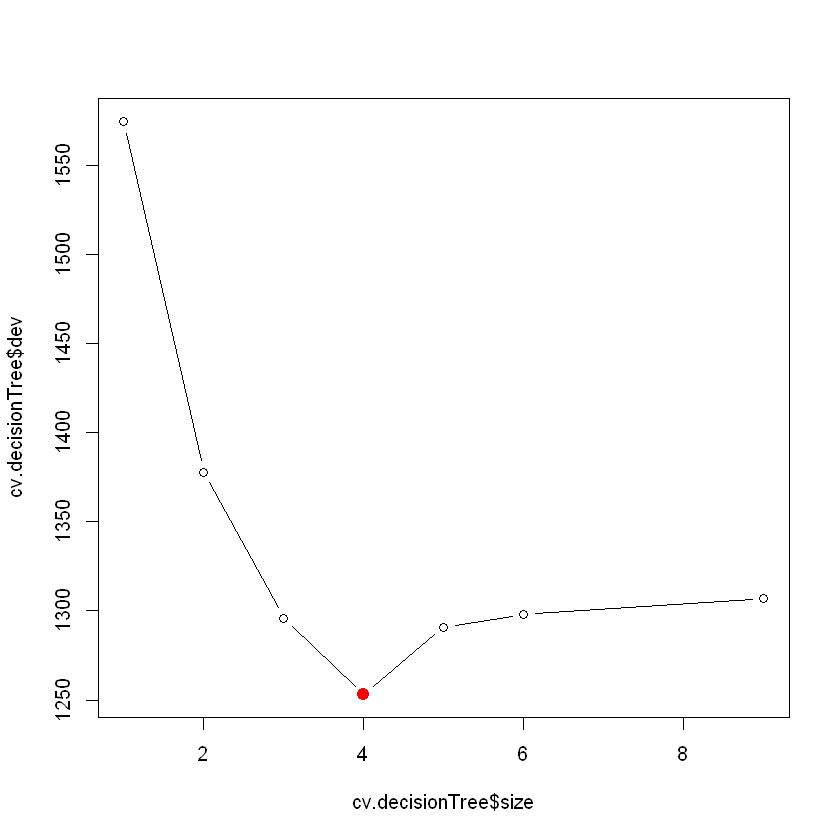

In [28]:
# use cross-validation to determine the optimal level of tree complexity
cv.decisionTree <- cv.tree(decisionTree, FUN = prune.misclass)
cv.decisionTree

# determine the optimal number of terminal nodes
tree.min <- which.min(cv.decisionTree$dev)
bestSubTree <- cv.decisionTree$size[tree.min]
bestSubTree

plot(cv.decisionTree$size, cv.decisionTree$dev, type = "b")
points(cv.decisionTree$size[tree.min], cv.decisionTree$dev[tree.min], col = "red", cex = 2, pch = 20)

Looks like the optimal tree is the one with **4 terminal nodes**.


Classification tree:
snip.tree(tree = decisionTree, nodes = c(4L, 7L, 6L, 5L))
Variables actually used in tree construction:
[1] "ATT1"  "ATT5"  "ATT10"
Number of terminal nodes:  4 
Residual mean deviance:  2.245 = 5379 / 2396 
Misclassification error rate: 0.5125 = 1230 / 2400 

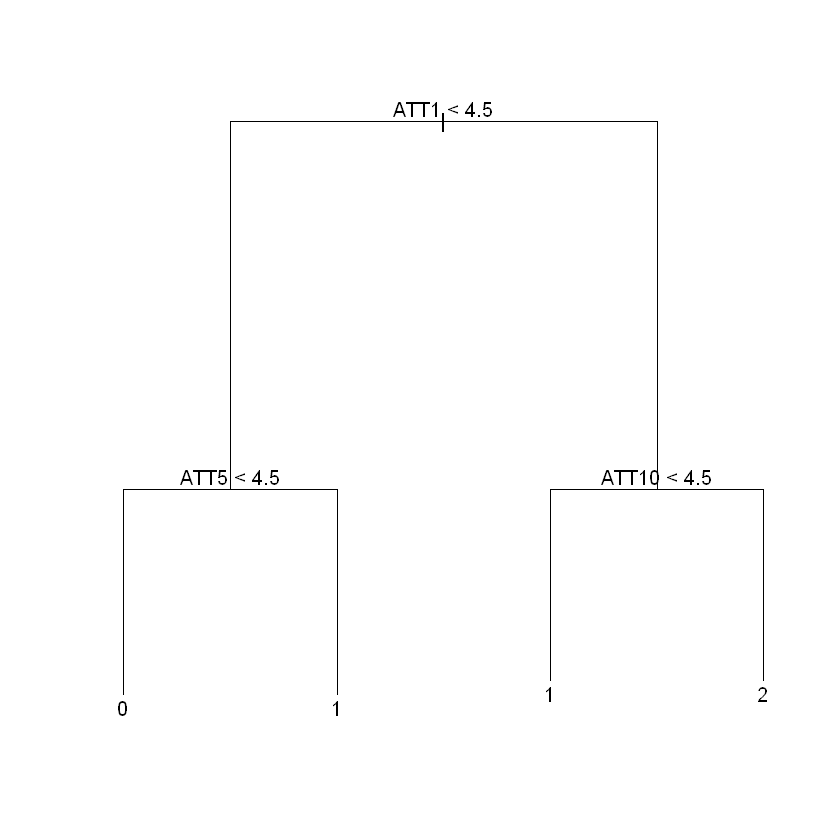

In [29]:
# use prune.tree function
prune.decisionTree <- prune.misclass(decisionTree, best = bestSubTree)
summary(prune.decisionTree)

#plot the tree
plot(prune.decisionTree)
text(prune.decisionTree, pretty = 0)

In [30]:
prunedDT.trainPred <- predict(prune.decisionTree, newdata = train, type="class")
pruneDT.trainAccuracy <- confusionMatrix(prunedDT.trainPred, train[,ncol(train)])$overall['Accuracy']
cat("\nPruned Decision Tree Train Accuracy: ", pruneDT.trainAccuracy)

prunedDT.pred <- predict(prune.decisionTree, newdata = test, type="class")
pruneDT.accuracy <- confusionMatrix(prunedDT.pred, test[,ncol(test)])$overall['Accuracy']
cat("\n\nPruned Decision Tree Test Accuracy: ", pruneDT.accuracy)


Pruned Decision Tree Train Accuracy:  0.4875

Pruned Decision Tree Test Accuracy:  0.4633333

**Analysis of the Model**
- The model produced a subtree of the previous decision tree, which only uses the features **ATT1, ATT5, and ATT10**. 
- The model still has <u>not included</u> class *3*, which will yield a high error rate.
- The resulting train accuracy of the pruned decision tree is **49%**, while for the test accuracy it is only **46%**, which is a drop in performance from using the whole tree.
- The resulting decision trees <u>underfits</u> the data, because it does not include all classes in the terminal nodes and still has a low training accuracy.

### 3.2.3 Random Forest

The concept of **Random Forest** is used to significantly improve the performance of decision trees. Since the earlier trees underfit the data, creating multiple subtrees which will predict based on a consensus can result in performance improvement. In general, performing random forest is a way to decrease **overfitting**, however, in the case of this example the tree clearly underfits because of its very low training accuracy. 

**Creating a random forest**

A collection of trees are created from the bootstrapped training data, and is splitted according to a subset of *m* features (usually $\sqrt{p}$, where $p$ is the number of features). This produces a tree that uses a *subset* of the training data and a *subset* of predictors, thereby ensuring that the result is not overfitted. However, since this results in a number of subtrees for classification the model is harder to interpret than a normal decision tree.

To perform random forest, the method `randomForest()` is used from the `randomForest` package. Random forest is performed with differing number of bootstraped subtrees indicated in the `ntree` parameter: 10, 50, 100, 500, and 1000. Each resulting randomForest is then analyzed according to their test accuracies.

In [31]:
?randomForest

In [32]:
K <- c(10, 50, 100, 500, 1000)

# use Random Forest
rf.accuracies <- as.data.frame(matrix(NA,nrow=length(K), ncol=3))
names(rf.accuracies) <- c('k', 'train.accuracy', 'test.accuracy')
i <- 1

mtry.val <- sqrt(10)
i <- 1
for (k in K){
    randomForest <- randomForest(Result ~ ., data = train, ntree = k, mtry = mtry.val, importance = TRUE)
    randomForest.pred <- predict(randomForest, newdata = test, type = "class")
    randomForest.accuracy <- confusionMatrix(randomForest.pred, test[,ncol(test)])$overall['Accuracy']
    
    randomForest.trainPred <- predict(randomForest, newdata = train, type = "class")
    randomForest.trainAccuracy <- confusionMatrix(randomForest.trainPred, train[,ncol(train)])$overall['Accuracy']


    rf.accuracies[i, 'k'] <- k
    rf.accuracies[i, 'train.accuracy'] <- randomForest.trainAccuracy
    rf.accuracies[i, 'test.accuracy'] <- randomForest.accuracy
    i <- i + 1
}

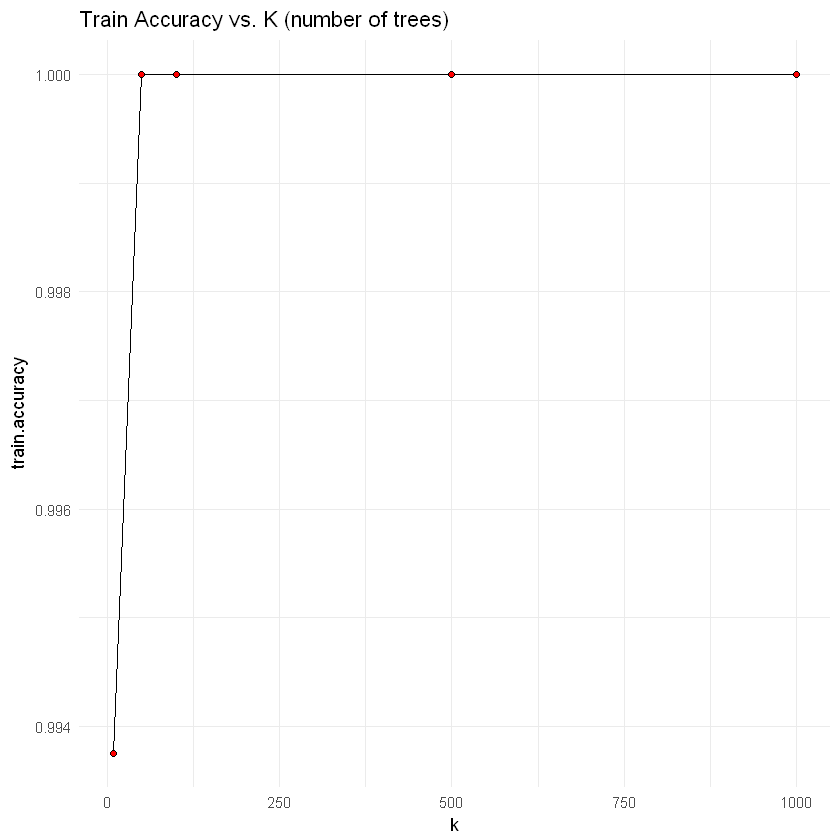

In [33]:
ggplot(data=rf.accuracies,aes(x=k, y=train.accuracy)) + geom_line() + geom_point(shape=21, fill='red')  +
    ggtitle('Train Accuracy vs. K (number of trees)') + theme_minimal()

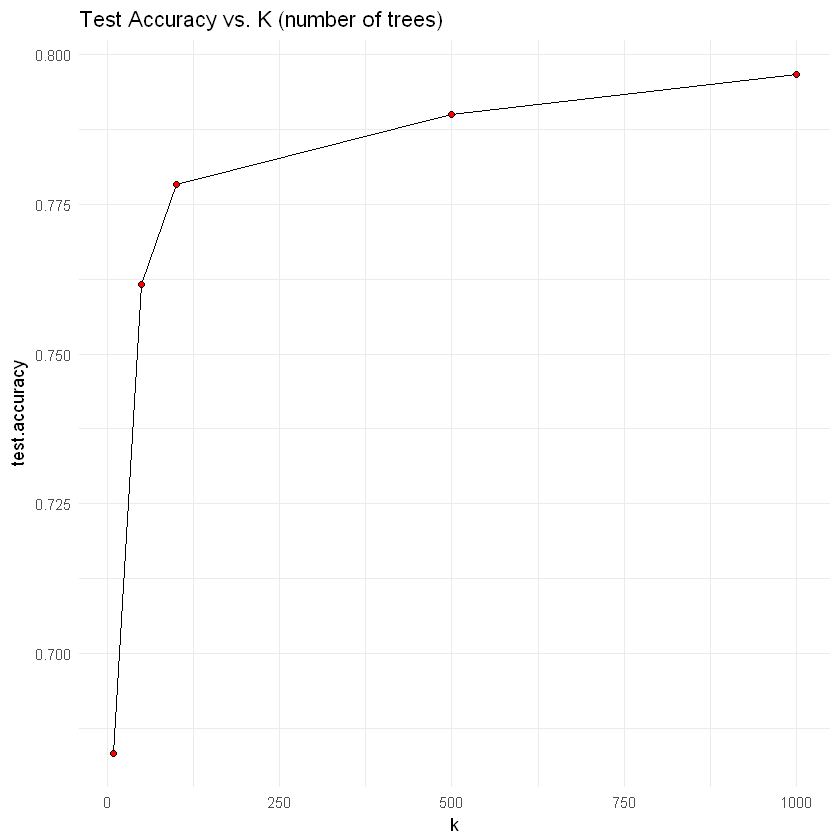

In [34]:
ggplot(data=rf.accuracies,aes(x=k, y=test.accuracy)) + geom_line() + geom_point(shape=21, fill='red')  +
    ggtitle('Test Accuracy vs. K (number of trees)') + theme_minimal()

#### Summary of Random Forest Models

The table below shows the overall performance of doing random forest in the dataset.

In [35]:
cat("Random Forest Accuracies")
rf.accuracies

bestK <- rf.accuracies[rf.accuracies$test.accuracy == max(rf.accuracies$test.accuracy),]$k
cat("\nBest K:", bestK)

rf.accuracies[rf.accuracies$test.accuracy == max(rf.accuracies$test.accuracy),]

Random Forest Accuracies

k,train.accuracy,test.accuracy
10,0.99375,0.6833333
50,1.00000,0.7616667
100,1.00000,0.7783333
500,1.00000,0.7900000
1000,1.00000,0.7966667



Best K: 1000

,k,train.accuracy,test.accuracy
5,1000,1,0.7966667


**Analysis of the Models**
- Random forest did improve the performance of decision trees significantly. 
- At `k = 50` onwards, the random forest model was able to predict all training data correctly, which is considered <u>overfitting</u>. 
- Because of bootstrapping, even if the model overfits the training data, random forest produced formidable test accuracies of almost **~80%**.
- Overfitting is severe at `k = 10`, but variance decreases as `k` increases. This is why the best model considered is the one with the most subtrees (`k = 1000`).

**Variable importance**

To get a better insight at the resulting random forest model, variable importance is retrieved using the `varImp()` function.
The parameter `type = 1` means we want to retrieve the overall variable importance.

In [36]:
randomForest <- randomForest(Result ~ ., data = train, ntree = bestK, importance = TRUE)

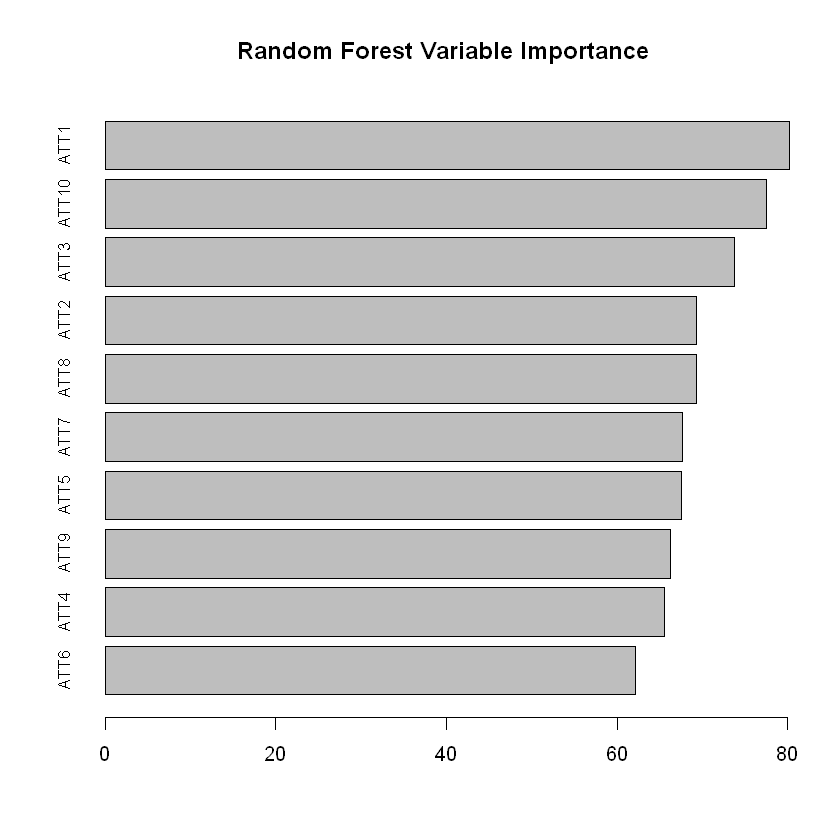

In [37]:
rf.varImp <- varImp(randomForest, type = 1)
rf.varImp[,'Attributes'] <- rownames(rf.varImp)
rf.varImp <- rf.varImp[order(rf.varImp$Overall),]

# plot the variable importance
barplot(rf.varImp$Overall, horiz = TRUE, names.arg = rf.varImp$Attributes, cex.names = 0.8)
title("Random Forest Variable Importance")

The most important features according to the randomForest model are **ATT1, ATT10, and ATT7**, while **ATT5, ATT4, and ATT6** were the least important.

## 3.3 Support Vector Machines

**Support Vector Machines** (SVM) are one of the most popular ways of classification especially for non-linear decision boundaries. SVMs enlarge the feature space through the use of *similarity functions* or **kernels** to accommodate non-linear boundary between classes. There are three used kernels in this notebook: **radial kernel, linear kernel, and polynomial kernel.**

To perform SVM, the `svm()` function is used from the `e1071` package.

SVMs are parameterized by a **cost** value. The cost value describes how strict would you allow certain outliers from each classes to be misclassfieid. It also determines the number of support vectors needed to detect the decision boundary. If the cost value is <u>large</u>, there is a possibility of having a <u>high bias but low variance</u> predictions. On the other hand, if the cost value is <u>small</u>, the model is prone to <u>low bias but high variance</u>. Therefore it is important to produce an optimal cost parameter. To do this, a 10-fold cross validation method is used in the `tune()` function from the `e1071` package.

As this type of model is said to be very robust and is said to be more powerful than other classification models, I have decided to include this in this notebook.

### 3.3.1 Radial Kernel SVM

**Radial Kernel SVMs** are one of the most popular kernels available, which only considers nearby training observations for predicting the class of the test observation. 

The kernel function is


$$
K(x_i, l_i) = exp(-\gamma\sum_{j=1}^{p}(x_\text{ij} - l_\text{ij})^2)
$$

A positive constant parameter called $\gamma$ is used to aid in predicting the non-linear decision boundary. Together with the **cost** parameter, the **gamma** parameter is also tuned via cross validation.

In [38]:
tune.radial <- tune(svm, Result ~ ., 
                    data = train, 
                    kernel = "radial", 
                    ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), 
                    gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.radial)

svm.radial <- svm(Result ~ ., 
                  kernel = "radial", 
                  data = train, 
                  cost = tune.radial$best.parameter$cost, 
                  gamma =  tune.radial$best.parameter$gamma)
summary(svm.radial)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01833333 

- Detailed performance results:
    cost gamma      error  dispersion
1  1e-02 1e-02 0.65083333 0.017546235
2  1e-01 1e-02 0.28458333 0.023899384
3  1e+00 1e-02 0.05916667 0.017213259
4  5e+00 1e-02 0.03291667 0.013241874
5  1e+01 1e-02 0.02500000 0.007607258
6  1e+02 1e-02 0.01833333 0.011653432
7  1e-02 1e-01 0.49083333 0.038530091
8  1e-01 1e-01 0.16166667 0.023471811
9  1e+00 1e-01 0.06291667 0.011528614
10 5e+00 1e-01 0.06916667 0.015365907
11 1e+01 1e-01 0.06875000 0.014197950
12 1e+02 1e-01 0.06416667 0.013058510
13 1e-02 1e+00 0.65083333 0.017546235
14 1e-01 1e+00 0.65083333 0.017546235
15 1e+00 1e+00 0.39250000 0.024279748
16 5e+00 1e+00 0.37375000 0.016787755
17 1e+01 1e+00 0.37375000 0.016787755
18 1e+02 1e+00 0.37375000 0.016787755
19 1e-02 5e+00 0.65083333 0.017546235
20 1e-01 5e+00 0.65083333 0.017546235
21 1e+00 5e+00 0.6


Call:
svm(formula = Result ~ ., data = train, kernel = "radial", cost = tune.radial$best.parameter$cost, 
    gamma = tune.radial$best.parameter$gamma)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.01 

Number of Support Vectors:  362

 ( 106 73 148 35 )


Number of Classes:  4 

Levels: 
 0 1 2 3




**Analysis of the model**
- The model took a moderate amount of time to be trained, as radial SVMs are computationally expensive. 
- According to the CV, the optimal **cost** parameter is 100, while the radial kernel's optimal **gamma** parameter is 0.01.
- It took a total of **362** support vectors, **106** support vectors for class 0, **73** support vectors for class 1, **148** support vectors for class 2, and **35** vectors for class 3.

### 3.3.2 Linear Kernel SVM

**Linear Kernel SVM** is equivalent to creating a **support vector classifier**, which is a soft margin classifier that allows some outliers to be on the wrong side of the *linear* decision boundary of the hyperplane. It uses the *Pearson Correlation* to determine the similarity of two points. Basically, this version of SVM gives out a standard linear classifier. 
The kernel function is

$$
K(x_i, l_i) = \sum_{j=1}^{p}x_\text{ij}l_\text{ij}
$$

Aside from the cost parameter, no additional parameters are used.

In [39]:
tune.linear <- tune(svm, Result ~ ., 
                    data = train, 
                    kernel = "linear", 
                    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.linear)
svm.linear <- svm(Result ~ ., 
                  kernel = "linear", 
                  data = train, 
                  cost = tune.linear$best.parameter$cost)
summary(svm.linear)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.0004166667 

- Detailed performance results:
          cost        error  dispersion
1   0.01000000 0.0804166667 0.024140311
2   0.01778279 0.0495833333 0.015768630
3   0.03162278 0.0362500000 0.011955744
4   0.05623413 0.0270833333 0.008838835
5   0.10000000 0.0245833333 0.008436857
6   0.17782794 0.0158333333 0.007027284
7   0.31622777 0.0075000000 0.004730385
8   0.56234133 0.0141666667 0.005624571
9   1.00000000 0.0100000000 0.006860605
10  1.77827941 0.0045833333 0.002365193
11  3.16227766 0.0025000000 0.002151657
12  5.62341325 0.0020833333 0.002196026
13 10.00000000 0.0004166667 0.001317616



Call:
svm(formula = Result ~ ., data = train, kernel = "linear", cost = tune.linear$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.1 

Number of Support Vectors:  372

 ( 90 76 178 28 )


Number of Classes:  4 

Levels: 
 0 1 2 3




**Analysis of the model**
- This SVM was the fastest to be trained among other SVMs, as it only uses a linear similarity function. 
- According to the CV, the optimal **cost** parameter is 10.
- It took a total of **372** support vectors, **90** support vectors for class 0, **76** support vectors for class 1, **178** support vectors for class 2, and **28** vectors for class 3.
- There were less support vectors needed because the decision boundary is linear.

### 3.3.3 Polynomial Kernel SVM of Order 2

**Polynomial kernels** extend the linear kernel by just extending the linear kernel's equation into higher dimension. In this case, the polynomial kernel of order 2 extends it to a quadratic function, which produces a non-linear decision boundary so it is considered more robust than the linear kernel but also more computationally expensive.

The kernel function is

$$
K(x_i, l_i) = (1 + \sum_{j=1}^{p}x_\text{ij}l_\text{ij})^2
$$

In [40]:
tune.poly2 <- tune(svm, Result ~ ., 
                  data = train, 
                  kernel = "polynomial", 
                  degree = 2, 
                  ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.poly2)
svm.poly2 <- svm(Result ~ ., 
                  kernel = "polynomial", 
                  degree = 2,
                  data = train, 
                  cost = tune.poly2$best.parameter$cost)
summary(svm.poly2)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.2479167 

- Detailed performance results:
          cost     error dispersion
1   0.01000000 0.5937500 0.05713890
2   0.01778279 0.5666667 0.03742276
3   0.03162278 0.5291667 0.03339115
4   0.05623413 0.4950000 0.03741245
5   0.10000000 0.4508333 0.03267876
6   0.17782794 0.3933333 0.03063122
7   0.31622777 0.3508333 0.03009758
8   0.56234133 0.3137500 0.03390994
9   1.00000000 0.2937500 0.03442932
10  1.77827941 0.2675000 0.02898755
11  3.16227766 0.2600000 0.03346041
12  5.62341325 0.2520833 0.03607102
13 10.00000000 0.2479167 0.03174758



Call:
svm(formula = Result ~ ., data = train, kernel = "polynomial", degree = 2, 
    cost = tune.poly2$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  2 
      gamma:  0.1 
     coef.0:  0 

Number of Support Vectors:  1341

 ( 439 527 281 94 )


Number of Classes:  4 

Levels: 
 0 1 2 3




**Analysis of the model**
- This SVM was the one of the slowest to be trained, due to its complex similarity function. 
- According to the CV, the optimal **cost** parameter is 10, which is between the cost of linear and radial kernels.
- It took a total of **1341** support vectors, **439** support vectors for class 0, **527** support vectors for class 1, **281** support vectors for class 2, and **94** vectors for class 3.
- The number of vectors for order 2 is way more than both the radial and linear kernel.

### 3.3.4 Polynomial Kernel SVM of Order 3

Again, a polynomial kernel is implemented in this case with order 3, which makes it more complicated than order 2 but is more flexible in terms of identifying the decision boundary.

The kernel function is

$$
K(x_i, l_i) = (1 + \sum_{j=1}^{p}x_\text{ij}l_\text{ij})^3
$$

In [41]:
tune.poly3 <- tune(svm, Result ~ ., 
                  data = train, 
                  kernel = "polynomial", 
                  degree = 3, 
                  ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.poly3)
svm.poly3 <- svm(Result ~ ., 
                  kernel = "polynomial", 
                  degree = 3,
                  data = train, 
                  cost = tune.poly3$best.parameter$cost)
summary(svm.poly3)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.13375 

- Detailed performance results:
          cost     error dispersion
1   0.01000000 0.5904167 0.12212828
2   0.01778279 0.5216667 0.07489190
3   0.03162278 0.4129167 0.03795760
4   0.05623413 0.2662500 0.03358987
5   0.10000000 0.2012500 0.02332755
6   0.17782794 0.1633333 0.01593292
7   0.31622777 0.1458333 0.01631575
8   0.56234133 0.1395833 0.01995848
9   1.00000000 0.1345833 0.02265635
10  1.77827941 0.1370833 0.01888582
11  3.16227766 0.1366667 0.02020344
12  5.62341325 0.1391667 0.01610153
13 10.00000000 0.1337500 0.01233690



Call:
svm(formula = Result ~ ., data = train, kernel = "polynomial", degree = 3, 
    cost = tune.poly3$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
      gamma:  0.1 
     coef.0:  0 

Number of Support Vectors:  827

 ( 222 187 369 49 )


Number of Classes:  4 

Levels: 
 0 1 2 3




**Analysis of the model**
- This SVM was the one of the slowest to be trained, due to its complex similarity function. 
- According to the CV, the optimal **cost** parameter is 10.
- It took a total of **827** support vectors, **222** support vectors for class 0, **187** support vectors for class 1, **369** support vectors for class 2, and **49** vectors for class 3.

### 3.3.5 Polynomial SVM of Order 4

The kernel function of this polynomial SVM is

$$
K(x_i, l_i) = (1 + \sum_{j=1}^{p}x_\text{ij}l_\text{ij})^4
$$

In [42]:
tune.poly4 <- tune(svm, Result ~ ., 
                  data = train, 
                  kernel = "polynomial", 
                  degree = 4, 
                  ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.poly4)
svm.poly4 <- svm(Result ~ ., 
                  kernel = "polynomial", 
                  degree = 4,
                  data = train, 
                  cost = tune.poly4$best.parameter$cost)
summary(svm.poly4)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 5.623413

- best performance: 0.2366667 

- Detailed performance results:
          cost     error dispersion
1   0.01000000 0.6350000 0.05118955
2   0.01778279 0.5716667 0.06780851
3   0.03162278 0.5295833 0.03039414
4   0.05623413 0.4545833 0.01938980
5   0.10000000 0.3912500 0.02269038
6   0.17782794 0.3512500 0.01757370
7   0.31622777 0.3125000 0.02315741
8   0.56234133 0.2800000 0.02551930
9   1.00000000 0.2541667 0.02900085
10  1.77827941 0.2529167 0.02469334
11  3.16227766 0.2429167 0.02959670
12  5.62341325 0.2366667 0.02797155
13 10.00000000 0.2408333 0.02203042



Call:
svm(formula = Result ~ ., data = train, kernel = "polynomial", degree = 4, 
    cost = tune.poly4$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  5.623413 
     degree:  4 
      gamma:  0.1 
     coef.0:  0 

Number of Support Vectors:  1651

 ( 404 574 580 93 )


Number of Classes:  4 

Levels: 
 0 1 2 3




**Analysis of the model**
- This SVM was the one of the slowest to be trained, due to its complex similarity function. 
- According to the CV, the optimal **cost** parameter is 0.1, which is prone to being biased.
- It took a total of **1651** support vectors, **404** support vectors for class 0, **574** support vectors for class 1, **580** support vectors for class 2, and **93** vectors for class 3.

It can be inferred then that polynomial kernels with orders 3 and 4 is not recommended in this dataset, as they do not pose any improvements on the model made with order 2.

### 3.3.6 Summary of SVM Models

So far we have generated a lot of models. To determine its performance against the dataset, the training accuracy and the testing accuracy of all the models are computed, and is consolidated on a single table for easier analysis.

In [43]:
# create a table that summarizes the accuracy
# number of models made
n <- 5
svm.accuracies <- as.data.frame(matrix(NA,nrow=n, ncol=3))
names(svm.accuracies) <- c('model', 'train.accuracy', 'test.accuracy')

In [44]:
##
## Getting the training accuracy
## and adding it to the summary table
##

i <- 1

# get train prediction accuracy for the radial model
radial.train.pred <- predict(svm.radial, train)
radial.train.accuracy <- confusionMatrix(radial.train.pred, train[,ncol(train)])$overall['Accuracy']
svm.accuracies[i, 'model'] <- 'SVM with radial kernel'
svm.accuracies[i, 'train.accuracy'] <- radial.train.accuracy
i <- i + 1

# get train prediction accuracy for the linear model
linear.train.pred <- predict(svm.linear, train)
linear.train.accuracy <- confusionMatrix(linear.train.pred, train[,ncol(train)])$overall['Accuracy']
svm.accuracies[i, 'model'] <- 'SVM with linear kernel'
svm.accuracies[i, 'train.accuracy'] <- linear.train.accuracy
i <- i + 1

# get train prediction accuracy for the polynomial model
poly2.train.pred <- predict(svm.poly2, train)
poly2.train.accuracy <- confusionMatrix(poly2.train.pred, train[,ncol(train)])$overall['Accuracy']
svm.accuracies[i, 'model'] <- 'SVM with polynomial kernel of order 2'
svm.accuracies[i, 'train.accuracy'] <- poly2.train.accuracy
i <- i + 1

# get train prediction accuracy for the polynomial model
poly3.train.pred <- predict(svm.poly3, train)
poly3.train.accuracy <- confusionMatrix(poly3.train.pred, train[,ncol(train)])$overall['Accuracy']
svm.accuracies[i, 'model'] <- 'SVM with polynomial kernel of order 3'
svm.accuracies[i, 'train.accuracy'] <- poly3.train.accuracy
i <- i + 1

# get train prediction accuracy for the polynomial model
poly4.train.pred <- predict(svm.poly4, train)
poly4.train.accuracy <- confusionMatrix(poly4.train.pred, train[,ncol(train)])$overall['Accuracy']
svm.accuracies[i, 'model'] <- 'SVM with polynomial kernel of order 4'
svm.accuracies[i, 'train.accuracy'] <- poly4.train.accuracy
i <- i + 1

In [45]:
##
## Getting the testing accuracy
## and adding it to the summary table
##

i <- 1

# get test prediction accuracy for the radial model
radial.test.pred <- predict(svm.radial, test)
radial.test.accuracy <- confusionMatrix(radial.test.pred, test[,ncol(test)])$overall['Accuracy']
svm.accuracies[i, 'test.accuracy'] <- radial.test.accuracy
i <- i + 1

# get test prediction accuracy for the linear model
linear.test.pred <- predict(svm.linear, test)
linear.test.accuracy <- confusionMatrix(linear.test.pred, test[,ncol(test)])$overall['Accuracy']
svm.accuracies[i, 'test.accuracy'] <- linear.test.accuracy
i <- i + 1

# get test prediction accuracy for the polynomial model
poly2.test.pred <- predict(svm.poly2, test)
poly2.test.accuracy <- confusionMatrix(poly2.test.pred, test[,ncol(test)])$overall['Accuracy']
svm.accuracies[i, 'test.accuracy'] <- poly2.test.accuracy
i <- i + 1

# get test prediction accuracy for the polynomial model
poly3.test.pred <- predict(svm.poly3, test)
poly3.test.accuracy <- confusionMatrix(poly3.test.pred, test[,ncol(test)])$overall['Accuracy']
svm.accuracies[i, 'test.accuracy'] <- poly3.test.accuracy
i <- i + 1

# get test prediction accuracy for the polynomial model
poly4.test.pred <- predict(svm.poly4, test)
poly4.test.accuracy <- confusionMatrix(poly4.test.pred, test[,ncol(test)])$overall['Accuracy']
svm.accuracies[i, 'test.accuracy'] <- poly4.test.accuracy
i <- i + 1

In [46]:
# display the summary of accuracies
svm.accuracies

model,train.accuracy,test.accuracy
SVM with radial kernel,0.9991667,0.9833333
SVM with linear kernel,0.9995833,1.0000000
SVM with polynomial kernel of order 2,0.7900000,0.7750000
SVM with polynomial kernel of order 3,0.9679167,0.8950000
SVM with polynomial kernel of order 4,0.9454167,0.7883333


In [47]:
bestSVM <- svm.accuracies[svm.accuracies$test.accuracy == max(svm.accuracies$test.accuracy),]$model
cat("\nBest SVM model:", bestSVM)

svm.accuracies[svm.accuracies$test.accuracy == max(svm.accuracies$test.accuracy),]


Best SVM model: SVM with linear kernel

,model,train.accuracy,test.accuracy
2,SVM with linear kernel,0.9995833,1


**Analysis of model performance**
- The SVM with **radial kernel** and **linear kernel** were very good and powerful in determining the actual decision boundary. Both kernels almost got all the training observations right, which might suggest overfitting, but it also got high test accuracies, which tells that the model was very robust and was able to generalize well. 
- Both high test and train accuracies may be because of the large data size. More data means better performance. 
- Based on the accuracies (and the computation complexity), the **SVM with linear kernel** is a good model to the data. It has very high accuracy and does not take long to train.

## 3.4 Neural Networks

Note: Materials used in this section are based from FIT 5201: Data Analysis Algorithms lecture notes.

**Neural Networks** is another popular model for classification. Like SVM, it is also good at detecting non-linear decision boundaries. It is made up of a collection of neurons on multiple layers that may be used to enhance the feature space like SVM through the use of **activation functions**.

A basic neuron is made up of a collection of inputs $x_0, x_1, x_2, ..., x_j$ that goes through an *activation function* $h_\text{w,b}$ whose results are placed as another input to another neuron or the final output of the network. It is robust because Neural Networks can produce non-linear hidden units that enhances the feature space. One of the most popular activation function is the **logistic function** $\sigma(z)$ which is also featured in Logistic Regression.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Another popular activation function is the **tanh** function

$$
\text{tanh}(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

where z is the total weighted sum of the inputs

$$
z^{(l)} = \sum_{j=1}^{n}W_\text{ij}^{(l-1)}x_j + b_i^{(l-1)}
$$

These non-linear activation functions make it possible to detect non-linearities.

Neural Networks are parameterized by the weights $W_\text{ij}^{(l)}$ and the bias terms $b_i$ of the neuron $i$ with respect to input $j$ of the layer $l$.   

To implement Neural Networks in R, an external library called `h2o` is used. This library is a fast and scalable Machine Learning API that is popular among Data Scientist for being open-source. The installation options can be found <a href="http://h2o-release.s3.amazonaws.com/h2o/rel-weierstrass/6/index.html">here</a> (it's not just a simple `install.package()` call, unfortunately).

In [48]:
# just a simple Neural Network using the h2o library

# initialise h2o instance
localH2O <- h2o.init(nthreads = -1, port = 54321, startH2O = FALSE, max_mem_size = '6G', strict_version_check = FALSE)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         17 minutes 46 seconds 
    H2O cluster version:        3.15.0.4046 
    H2O cluster version age:    13 days  
    H2O cluster name:           mrkjse 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.52 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.3.2 (2016-10-31) 



**Implementing a Neural Network**

To train a Neural Network in `h2o`, the function `deeplearning()` is used. The parameters are self-explanatory, but those specific to neural networks are `hidden`, which indicates the number of hidden layers and their neurons (eg. hidden = c(100, 200, 100) means 3 hidden layers with the first and third hidden layer having 100 neurons while the second has 200). The activation function which can be `Sigmoid` or `Tanh`, `autoencoder` which is set to FALSE, and a regularizer `l2`.

In here I tested 10 different Neural Network models of varying hidden layer neurons from 100 to 1000 and recorded both their training and testing accuracies.

In [49]:
nn.train <- as.h2o(train)
nn.test <- as.h2o(test)
K <- seq(100, 1000, 100)

nn.accuracies <- as.data.frame(matrix(NA,nrow=length(K), ncol=3))
names(nn.accuracies) <- c('k', 'train.accuracy', 'test.accuracy')
i <- 1

set.seed(1234)
options(warn=-1)
for (k in K){
    nn.model <- h2o.deeplearning(    
          x = 1:(ncol(train) - 1), # select the feature space
          y = ncol(train), # select the result
          training_frame = nn.train, # specify the frame     
          hidden = c(k), # number of layers and their units
          epochs = 50, # maximum number of iteration 
          activation = 'Tanh', # activation function 
          autoencoder = FALSE, # is it an autoencoder? No
          l2 = 0.1 )

    nn.trainPredict <- h2o.predict(nn.model, nn.train)$predict
    nn.testPredict <- h2o.predict(nn.model, nn.test)$predict
    
    nn.trainAccuracy <- confusionMatrix(as.data.frame(nn.trainPredict)[,1], train[,ncol(train)])$overall['Accuracy']
    nn.testAccuracy <- confusionMatrix(as.data.frame(nn.testPredict)[,1], test[,ncol(test)])$overall['Accuracy']
    
    nn.accuracies[i, 'k'] <- k
    nn.accuracies[i, 'train.accuracy'] <- nn.trainAccuracy
    nn.accuracies[i, 'test.accuracy'] <- nn.testAccuracy
    i <- i + 1

}
options(warn=0)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

#### Summary of Neural Network Models

The Neural Network models are laid out on the suceeding cells. 

In [50]:
cat("Neural Network Accuracies")
nn.accuracies

bestK <- nn.accuracies[nn.accuracies$test.accuracy == max(nn.accuracies$test.accuracy),]$k
cat("\nBest K:", bestK)

nn.accuracies[nn.accuracies$test.accuracy == max(nn.accuracies$test.accuracy),][1,]

Neural Network Accuracies

k,train.accuracy,test.accuracy
100,0.8233333,0.8333333
200,0.8379167,0.8466667
300,0.8504167,0.8583333
400,0.8250000,0.8383333
500,0.8220833,0.8416667
600,0.8650000,0.8766667
700,0.8100000,0.8300000
800,0.8595833,0.8666667
900,0.8545833,0.8666667
1000,0.8237500,0.8383333



Best K: 600

,k,train.accuracy,test.accuracy
6,600,0.865,0.8766667


**Analysis of the models**
- The Neural Network models work fine even at `hidden = 100`, with both training and testing accuracies above **80%**, a very impressive performance. 
- Because we used an external API, the training time was faster compared to most SVM models, but SVM with linear kernel is still faster.
- Based from the accuracies, the best model is the Neural Network with **600 hidden layer neurons**. However, as the performance of all the models do not deviate much from each other, it is better to pick the Neural Network with **300 hidden layer neurons** because its performance is pretty close to the best model and is simplier.

# 4. Summary of the Classification Models 

Here is a consolidation of the best models created using different classifiers. There were a total of **23 models** trained and analysed, and the best **4 models** were evaluated below.

To recap, the classification model types are:

1. Naive Bayes
2. Random Forest
3. SVM
4. Neural Network

The analysis of the performance of the classifiers will be discussed in this section. The following cell creates a nice table that displays the best 4 models as indicated above.

In [51]:
# generate a summary table of the best four models per classification method
cat("Summary of the Models Created\n\n")
final.accuracies <- as.data.frame(matrix(NA,nrow=4, ncol=3))
names(final.accuracies) <- c('model', 'train.accuracy', 'test.accuracy')
i <- 1

final.accuracies[i, 'model'] <- 'Naive Bayes Classifier'
final.accuracies[i, 'train.accuracy'] <- naiveBayes.trainAccuracy
final.accuracies[i, 'test.accuracy'] <- naiveBayes.testAccuracy
i <- i + 1

final.accuracies[i, 'model'] <- 'Random Forest'
final.accuracies[i, 'train.accuracy'] <- rf.accuracies[rf.accuracies$test.accuracy == max(rf.accuracies$test.accuracy),]$train.accuracy
final.accuracies[i, 'test.accuracy'] <- rf.accuracies[rf.accuracies$test.accuracy == max(rf.accuracies$test.accuracy),]$test.accuracy
i <- i + 1

final.accuracies[i, 'model'] <- 'Support Vector Machines'
final.accuracies[i, 'train.accuracy'] <- svm.accuracies[svm.accuracies$test.accuracy == max(svm.accuracies$test.accuracy),]$train.accuracy
final.accuracies[i, 'test.accuracy'] <- svm.accuracies[svm.accuracies$test.accuracy == max(svm.accuracies$test.accuracy),]$test.accuracy
i <- i + 1

final.accuracies[i, 'model'] <- 'Neural Network'
final.accuracies[i, 'train.accuracy'] <- nn.accuracies[nn.accuracies$test.accuracy == max(nn.accuracies$test.accuracy),][1,]$test.accuracy
final.accuracies[i, 'test.accuracy'] <- nn.accuracies[nn.accuracies$test.accuracy == max(nn.accuracies$test.accuracy),][1,]$train.accuracy

final.accuracies

Summary of the Models Created



model,train.accuracy,test.accuracy
Naive Bayes Classifier,0.7941667,0.7733333
Random Forest,1.0000000,0.7966667
Support Vector Machines,0.9995833,1.0000000
Neural Network,0.8766667,0.8650000


In general, all models performed quite well on the data, with the minimum test accuracy at **77%** and the maximum at **100%**.

Before deriving which is the *best* model, let us examine each of their characteristics.

1. **Naive Bayes**
<br/>**PROs:** Good for small training datasets. Less prone to overfitting. Fast to train. Will generally perform on a par with advanced classifiers if the dataset is large.
<br/>**CONs:** Assumes all features are independent. Too simplistic look at the data. May suffer from high bias
<br/>**Use this for:** If you are sure that the data features are independent from each other; if the number of observations are less than the number of features; or you just want a *classifier-on-the-go* that's fast to implement.
<br/><br/><br/>
2. **Random Forest**
<br/>**PROs**: Decision trees easier to interpret. Can give an insight on variable importance. Can easily handle qualitative features. Handles bias-variance tradeoff very well (due to bootstrapping and feature selection)
<br/>**CONs**: Not as robust as other methods. Random forest can take a long execution time but still underperform compared to SVM and NN.
<br/>**Use this for:** If you want to create a model that is easy to interpret, or if your dataset has a lot of qualitative features and has a non-linear decision boundary.
<br/><br/><br/>
3. **SVM**
<br/>**PROs**: The *in*, the *popular*, some say it's the *best* (most of the time). SVMs are very robust due to a variety of kernels that may be used to detect various decision boundaries. Does not need a lot of parameters to train (just the `cost` for starters). As an optimisation problem, always arrives at the global minimum.
<br/>**CONs**: It is really hard to interpret and takes quite a while to train.
<br/>**Use this for:** If you believe the *end justifies the means* i.e. you just want the most robust results, never mind the computational cost. If your dataset looks very, very complex, then it might be better to try this one first then try the simplier models later. Do note that SVMs can still underperform in some scenarios (no free lunch!).
<br/><br/><br/>
4. **Neural Network**
<br/>**PROs**: Also *popular*. Also *in*. This is also very robust, and can be applied to a wide range of classification problems, no matter how complex the decision boundary is. Can learn from any data structure (images, music, speech, text, you name it). 
<br/>**CONs**: Also hard to interpret and still takes a while to train. As an optimisation problem, is said to get stuck at a local minima. Not as robust as SVMs.
<br/>**Use ths for:** Comparable to SVMs, use this if you want a robust classifier and does not care about the computational cost. Opt this if your dataset is non-structured. This gets the job done more often than not.


In picking the best model for this dataset, **based on accuracy**, <u>SVM</u> is the best. However, if you take into account **the bias-variance trade-off**, I would pick <u>Neural Networks</u> just because it does not seem to overfit the training data. If I want a **more interpretable model**, I would go for <u>Random Forests</u>, but if I want a **simple *and* interpretable model**, I would go for the <u>Naive Bayes</u>.


# 5. Conclusion

This notebook is an example on how to create a complete data analysis task to classify prostrate cancer stages. Results show that the chosen models used for classification perform well enough over the dataset, and the model should be chosen based on a variety of factors. The data analysis task are as follows:

1. **Exploratory Data Analysis** - Before doing any data modelling, it is important to perform EDA. This involves parsing the data correctly, cleaning it for any erroneous observations, checking basic statistics like the central tendency measures and the distribution, analysing the outliers, and detecting the relationships of the variables in the data.

2. **Regression for Imputation** - Regression is used to predict quantitative variables. It is important that the regression models are regularized to prevent overfitting.

3. **Prostrate Cancer Classification** - Several models were analyzed to check which one is the most appropriate classifier. It is important to choose your models carefully depending on the nature of the data and certain limitations like machine capabilities, and to always, always create several models for comparison.

4. **Use of Resampling and Cross Validation** - Throughout the whole notebook resampling methods like bootstrapping and cross validation are used to prevent the models from underfitting or overfitting the data.

5. **Documentation and Analysis** - The methods above will not matter much if the documentation of the code, analysis of the results, and justification of the steps are lacking. Being able to interpret and analyse your data correctly is half of what it takes to be a Data Scientist.

# 6. References Used

1. Stack Exchange Inc. (2017). *Neural networks vs support vector machines: are the second definitely superior?*. Retrieved from Cross Validated: https://stats.stackexchange.com/questions/30042/neural-networks-vs-support-vector-machines-are-the-second-definitely-superior.
2. James, G. et al. (2017). *An Introduction to Statistical Learning with Applications in R.* Springer Science+Business Media, New York.
3. Lecture notes from both FIT 5149 (made by Prof. R. Amarasiri) and FIT 5201 (made by Prof. Y. Kang, Prof. R. Amarasiri, and Prof. G. Haffari). (2017). Faculty of Information Technology, Monash University, Melbourne.
4. Ng, A. (2017). *Machine Learning.* Retrieved from Coursera: https://www.coursera.org/learn/machine-learning.